# Demos autoencoders

This demo is based on  https://blog.keras.io/building-autoencoders-in-keras.html

## Undercomplete autoencoder op MNIST (compression)

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers





In [22]:
###### Voor Tensorflow-GPU ########
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [23]:
# Loading dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

X_train = df_train.drop('label',axis=1).values
X_test  = df_test.drop('label',axis=1).values

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


In [14]:
# Functional model

# Dimension of the hidden encoding layer
encoding_dim = 64  
# Placeholder for input
input_img = Input(shape=(784,))
# "encoded" representation
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" representation
decoded = Dense(784, activation='sigmoid')(encoded)
# decoded = Dense(784, activation='softmax')(encoded)

# build autoencoder 
autoencoder = Model(input_img, decoded)


autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Create seperate encoder model
encoder = Model(input_img, encoded)

In [16]:
# Create a seperate decoder model

encoded_input = Input(shape=(encoding_dim,))
# get the last layer from the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [17]:
# Compile the autoencoder

# loss function: mean_squared error
#autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# loss function: binary_crossentropy
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# loss function: categorical_crossentropy
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

In [18]:
epochs = 50
batchsize = 256

autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batchsize,
                shuffle=True)

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 803.0214
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2174.8704
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3858.9641
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5647.1079
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7523.1680
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9400.5742
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11431.6328
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13431.7871
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15548.7510
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17683.1895
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19468.0625
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21683.3457
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23834.8887
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25577.5293
Epoch 15

In [19]:
# Testing
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


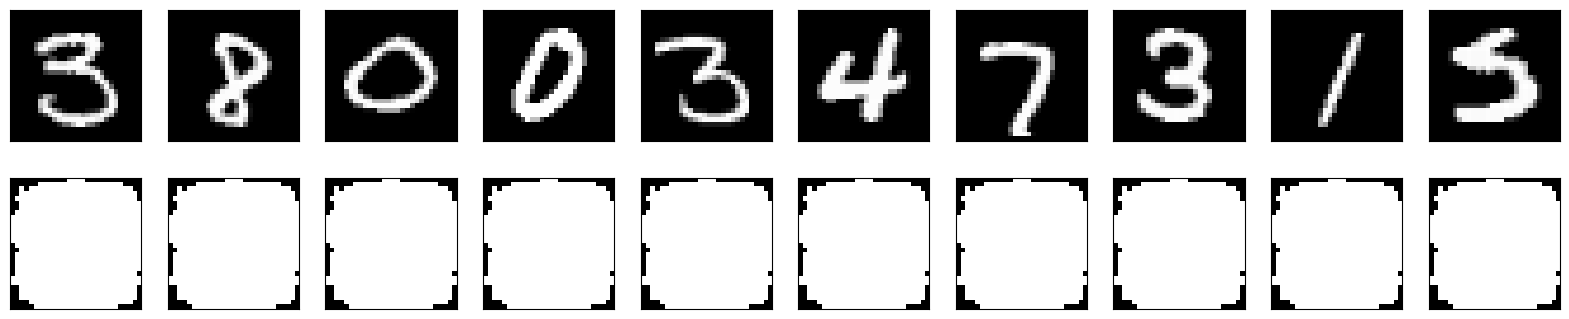

In [20]:
n = 10 # Number of images to show
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
print(encoded_imgs.mean())

6.4840136


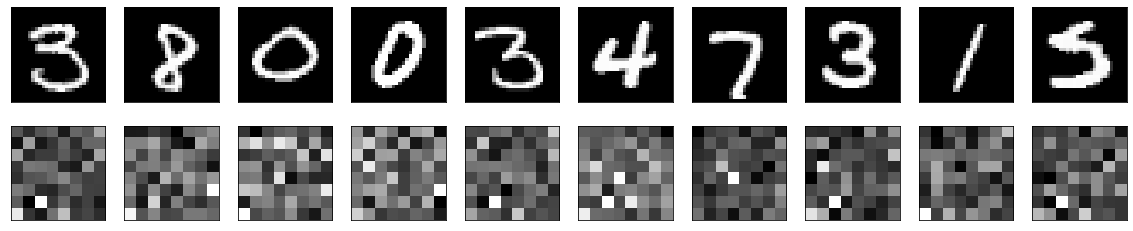

In [11]:
# Compression visualization

n = 10 # number of images to plot
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Visualize the encoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Deep undercomplete autoencoder



In [15]:
input_img = Input(shape=(784,))
encoded_img = Input(shape=(32,))


def encoder_module(x):
    encoded = Dense(128, activation='relu')(x)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    return encoded

def decoder_module(x):
    decoded = Dense(64, activation='relu')(x)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(784, activation='sigmoid')(decoded)
    return decoded

encoder = Model(input_img,   encoder_module(input_img))
encoder.summary()
decoder = Model(encoded_img, decoder_module(encoded_img))
decoder.summary()

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.summary()
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam',loss='mean_squared_error')


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_5 (Functional)       │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_6 (Functional)       │ (None, 784)            │       111,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True)


Epoch 1/100


2025-05-05 16:15:06.360368: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_224', 24 bytes spill stores, 24 bytes spill loads

2025-05-05 16:15:06.918619: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_238', 8 bytes spill stores, 8 bytes spill loads

2025-05-05 16:15:07.384087: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_245', 360 bytes spill stores, 360 bytes spill loads

2025-05-05 16:15:07.593574: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_252', 20 bytes spill stores, 20 bytes spill loads

2025-05-05 16:15:07.811766: I external/local_xla/xla/stream_exec

101/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1256

2025-05-05 16:15:13.256237: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_485', 88 bytes spill stores, 88 bytes spill loads

2025-05-05 16:15:14.305009: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_485', 84 bytes spill stores, 84 bytes spill loads

2025-05-05 16:15:14.434753: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_485', 80 bytes spill stores, 80 bytes spill loads

2025-05-05 16:15:14.523237: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_485', 60 bytes spill stores, 60 bytes spill loads



118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.1193
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0498
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0349
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174
Epoch 13/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168
Epoch 14/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163
Epoch 15/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

(12000, 32)


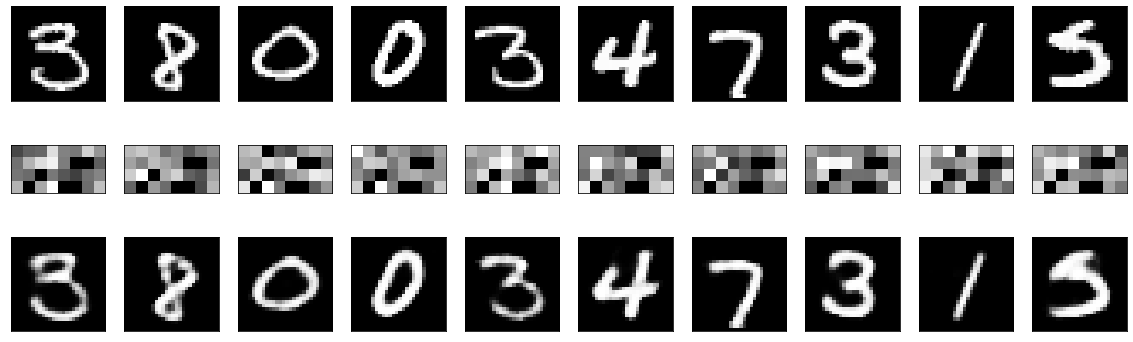

In [14]:

# Testing
encoded_imgs = encoder.predict(X_test)
print(encoded_imgs.shape)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10 # number of images to plot
plt.figure(figsize=(20, 6))
for i in range(n):
    # Originals
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #encoded values
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructions
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Undercomplete convolutional autoencoder

In [15]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

#Encoder
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoder = MaxPooling2D((2, 2), padding='same')(x)

# Decoder

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoder)
#autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1)) 
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1)) 

In [17]:
autoencoder.fit(X_train, X_train, epochs=10,
                batch_size=128,
                shuffle=True)

Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2704
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1623
Epoch 3/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1434
Epoch 4/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1340
Epoch 5/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1278
Epoch 6/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1237
Epoch 7/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1204
Epoch 8/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1180
Epoch 9/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1160
Epoch 10/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1144


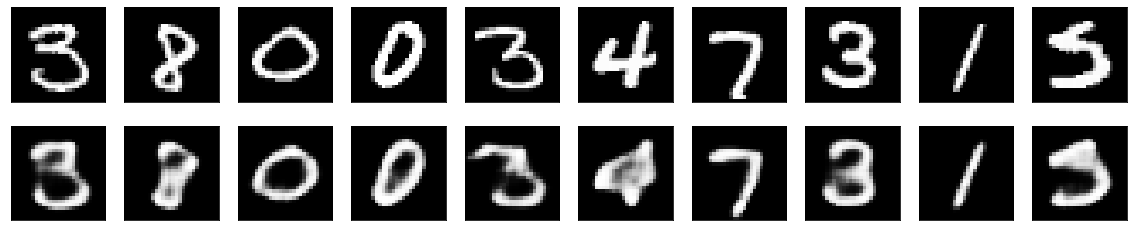

In [18]:
# Testing

decoded_imgs = autoencoder.predict(X_test)
n = 10 # number of images to plot
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Overcomplete sparse autoencoder

In [19]:
# Loading dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

X_train = df_train.drop('label',axis=1).values
X_test  = df_test.drop('label',axis=1).values

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.


encoding_dim = 900

input_img = Input(shape=(784,))
# L1 regularization
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-7))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


encoded_input = Input(shape=(encoding_dim,))
# Get the last layer
decoder_layer = autoencoder.layers[-1]
# create the autoencoder model
# Create a seperte encoder model
encoder = Model(input_img, encoded)
decoder = Model(encoded_input, decoder_layer(encoded_input))


# Compilation
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
epochs = 30 # More epochs needed due to regularization
batchsize = 256
autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batchsize,
                shuffle=True)

Epoch 1/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0444
Epoch 2/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0156
Epoch 3/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0093
Epoch 4/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0065
Epoch 5/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 6/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0039
Epoch 7/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0033
Epoch 8/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 9/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 10/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 11/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 12/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 13/30
118/118 [====

In [21]:
# Testing
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

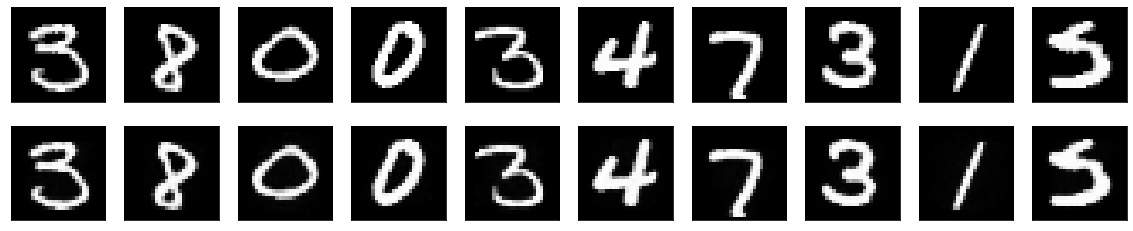

In [22]:
n = 10  # 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
print(encoded_imgs.mean())

0.4547235


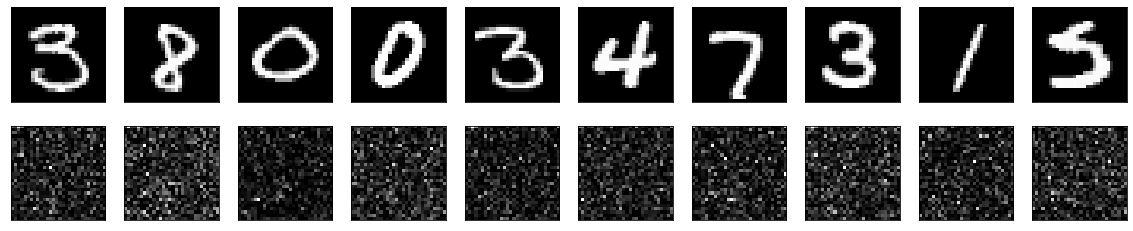

In [24]:
# Visualization

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Visualization of encoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(30, 30))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Overcomplete denoising autoencoder

In [25]:
# Loading images
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

X_train = df_train.drop('label',axis=1).values
X_test  = df_test.drop('label',axis=1).values

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Adding some level of noise

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

# noise clipping
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


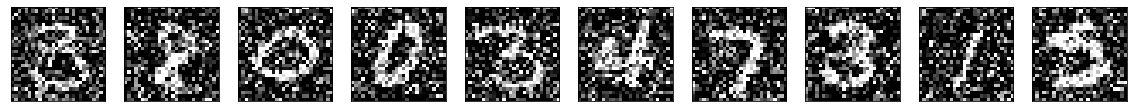

In [26]:
# Visualizatoin

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
# Overcomplete autoencoder

encoding_dim = 900

input_img = Input(shape=(784,))
# L1 regularization (put as many activations as possible to zero)
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


encoded_input = Input(shape=(encoding_dim,))
# get the last layer
decoder_layer = autoencoder.layers[-1]

encoder = Model(input_img, encoded)
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='mean_squared_error')
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

epochs = 30 # meer epochs omdat het model geregulariseerd wordt
batchsize = 256
autoencoder.fit(X_train_noisy, X_train,
                epochs=epochs,
                batch_size=batchsize,
                shuffle=True)



Epoch 1/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0549
Epoch 2/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0303
Epoch 3/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0251
Epoch 4/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0221
Epoch 5/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0192
Epoch 6/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0172
Epoch 7/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0160
Epoch 8/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0151
Epoch 9/30
118/118 [==============================] - 1s 8ms/step - loss: 0.0145
Epoch 10/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0140
Epoch 11/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0136
Epoch 12/30
118/118 [==============================] - 1s 7ms/step - loss: 0.0133
Epoch 13/30
118/118 [====

In [28]:
# Testing
encoded_imgs = encoder.predict(X_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

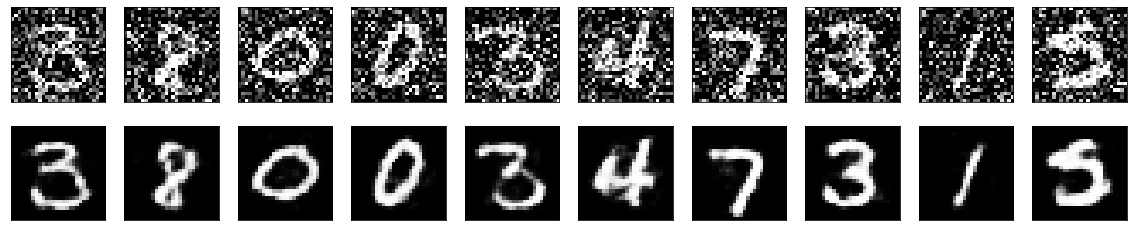

In [29]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Denoising convolutional autoencoder

In [30]:
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# representation is  (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X_train = np.reshape(X_train, (len(X_train), 28, 28, 1)) 
X_train_noisy = np.reshape(X_train_noisy, (len(X_train), 28, 28, 1)) 
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1)) 
X_test_noisy = np.reshape(X_test_noisy, (len(X_test_noisy), 28, 28, 1)) 

autoencoder.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=128)


Epoch 1/100
235/235 [==============================] - 14s 60ms/step - loss: 0.1955
Epoch 2/100
235/235 [==============================] - 14s 60ms/step - loss: 0.1224
Epoch 3/100
235/235 [==============================] - 14s 60ms/step - loss: 0.1155
Epoch 4/100
235/235 [==============================] - 14s 61ms/step - loss: 0.1117
Epoch 5/100
235/235 [==============================] - 14s 59ms/step - loss: 0.1092
Epoch 6/100
235/235 [==============================] - 14s 61ms/step - loss: 0.1073
Epoch 7/100
235/235 [==============================] - 14s 61ms/step - loss: 0.1056
Epoch 8/100
235/235 [==============================] - 14s 60ms/step - loss: 0.1044
Epoch 9/100
235/235 [==============================] - 14s 61ms/step - loss: 0.1034
Epoch 10/100
235/235 [==============================] - 14s 61ms/step - loss: 0.1027
Epoch 11/100
235/235 [==============================] - 14s 60ms/step - loss: 0.1019
Epoch 12/100
235/235 [==============================] - 14s 60ms/step - lo

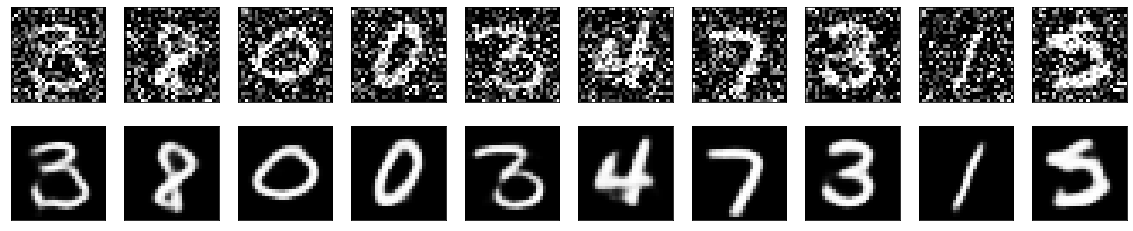

In [31]:
# Testing

decoded_imgs = autoencoder.predict(X_test_noisy)
n = 10 #aantal te tonen afbeeldingen
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originelen
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructies
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0
